In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
%matplotlib inline
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_excel("Coca.xlsx")

In [3]:
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
data.shape

(42, 2)

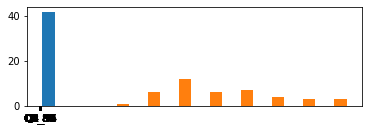

In [11]:
#Histogram
pyplot.subplot(212)
pyplot.hist(data)
pyplot.show()

In [12]:
data["Quarter"]=0

In [13]:
data["Quarter"]=data["Quarter"].astype("str")

In [16]:
for i in range(42):
    p=data['Quarter'][i]
    data['Quarter'][i]=p[4:6]

<ipython-input-16-72540575c750>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarter'][i]=p[4:6]


In [18]:
data1=pd.DataFrame(pd.get_dummies(data['Quarter']))

In [19]:
data1.head()

,
0,1
1,1
2,1
3,1
4,1


In [20]:
data2=pd.concat([data,data1],axis=1)

In [22]:
data2['t']=np.arange(1,43)

In [23]:
data2['t_squared']=data2['t']*data2['t']

In [24]:
data2['log_Sales']=np.log(data['Sales'])

In [25]:
train=data1.head(80)
test=data1.tail(16)

<AxesSubplot:>

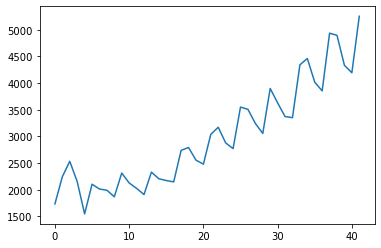

In [26]:
data['Sales'].plot()

In [28]:
#Linear Model
import statsmodels.formula.api as smf
from math import sqrt

In [33]:
linear_model=smf.ols('Sales~t',data=data2).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(data2['t'])))
rmse_linear=np.sqrt(np.mean((np.array(data2['Sales'])-np.array(pred_linear))**2))
rmse_linear

380.3714094193975

In [34]:
#Exponential
Exp=smf.ols('log_Sales~t',data=data2).fit()
pred_Exp=pd.Series(Exp.predict(pd.DataFrame(data2['t'])))
rmse_Exp=np.sqrt(np.mean((np.array(data2['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

329.8260395896174

In [35]:
#Quadratic
Quad=smf.ols('Sales~t+t_squared',data=data2).fit()
pred_Quad=pd.Series(Quad.predict(data2[["t","t_squared"]]))
rmse_Quad=np.sqrt(np.mean((np.array(data2['Sales'])-np.array(pred_Quad)**2)))
rmse_Quad

<ipython-input-35-a23335075466>:4: RuntimeWarning: invalid value encountered in sqrt
  rmse_Quad=np.sqrt(np.mean((np.array(data2['Sales'])-np.array(pred_Quad)**2)))


nan

In [36]:
#Additive Seasonality 
add_sea=smf.ols('Sales~t+t_squared',data=data2).fit()
pred_add_sea=pd.Series(add_sea.predict(data2[["t","t_squared"]]))
rmse_add_sea=np.sqrt(np.mean((np.array(data2['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

305.0823482003476

In [37]:
#Additional Seasonality Quadratic
add_sea_Quad=smf.ols('Sales~t+t_squared',data=data2).fit()
pred_add_sea_quad=pd.Series(add_sea_Quad.predict(data2[["t","t_squared"]]))
rmse_add_sea_quad=np.sqrt(np.mean((np.array(data2["Sales"])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

305.0823482003476

In [42]:
# Multiplicative Seasonality

Mul_sea = smf.ols('Sales~t+t_squared',data = data2).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(data2))
rmse_Mult_sea = np.sqrt(np.mean((np.array(data2['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

inf

In [43]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('Sales~t+t_squared',data = data2).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(data2))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(data2['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

inf

In [44]:
#Compare the results

data3={"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data3)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,rmse_add_sea,305.082348
4,rmse_add_sea_quad,305.082348
1,rmse_Exp,329.826040
0,rmse_linear,380.371409
5,rmse_Mult_sea,inf
6,rmse_Mult_add_sea,inf
2,rmse_Quad,NaN


In [45]:
predict_data=data2

In [46]:
predict_data

,Quarter,Sales,,t,t_squared,log_Sales
0,,1734.827000,1,1,1,7.458663
1,,2244.960999,1,2,4,7.716443
2,,2533.804993,1,3,9,7.837477
3,,2154.962997,1,4,16,7.675529
4,,1547.818996,1,5,25,7.344602
5,,2104.411995,1,6,36,7.651791
6,,2014.362999,1,7,49,7.608058
7,,1991.746998,1,8,64,7.596767
8,,1869.049999,1,9,81,7.533186
9,,2313.631996,1,10,100,7.746574


In [47]:
#Build the model on entire dataset
model_full=smf.ols('Sales~t+t_squared',data=data2).fit()

In [48]:
pred_new=pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     1965.086473
1     1969.154619
2     1976.683265
3     1987.672410
4     2002.122054
5     2020.032198
6     2041.402841
7     2066.233983
8     2094.525625
9     2126.277767
10    2161.490408
11    2200.163548
12    2242.297188
13    2287.891327
14    2336.945965
15    2389.461103
16    2445.436740
17    2504.872877
18    2567.769513
19    2634.126649
20    2703.944284
21    2777.222418
22    2853.961052
23    2934.160185
24    3017.819818
25    3104.939950
26    3195.520581
27    3289.561712
28    3387.063342
29    3488.025472
30    3592.448101
31    3700.331229
32    3811.674857
33    3926.478984
34    4044.743611
35    4166.468737
36    4291.654363
37    4420.300488
38    4552.407112
39    4687.974236
40    4827.001859
41    4969.489982
dtype: float64

In [49]:
predict_data["forcasted_Sales"]=pd.Series(pred_new)

In [50]:
predict_data

,Quarter,Sales,,t,t_squared,log_Sales,forcasted_Sales
0,,1734.827000,1,1,1,7.458663,1965.086473
1,,2244.960999,1,2,4,7.716443,1969.154619
2,,2533.804993,1,3,9,7.837477,1976.683265
3,,2154.962997,1,4,16,7.675529,1987.672410
4,,1547.818996,1,5,25,7.344602,2002.122054
5,,2104.411995,1,6,36,7.651791,2020.032198
6,,2014.362999,1,7,49,7.608058,2041.402841
7,,1991.746998,1,8,64,7.596767,2066.233983
8,,1869.049999,1,9,81,7.533186,2094.525625
9,,2313.631996,1,10,100,7.746574,2126.277767
